Name: Sudarshan Rukminikant Wadajkar

Email: wadajkar0@gmail.com

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from numpy import arange
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders import BinaryEncoder
from sklearn import set_config
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN 
from imblearn.combine import SMOTETomek, SMOTEENN
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

# Data Exploration 

In [2]:
df = pd.read_csv('credit_train.csv')
original_df = df

In [3]:
df.shape

#100000 rows and 18 columns

(100000, 18)

In [4]:
df.columns

Index(['Loan ID', 'Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [5]:
df.head()

#Getting a feel of how the data looks by extracting first 5 rows

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,L-18553-88177a-12bsdc-aa-1,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,L-18553-88177a-12bsdc-aa-2,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,L-18553-88177a-12bsdc-aa-3,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,L-18553-88177a-12bsdc-aa-4,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,L-18553-88177a-12bsdc-aa-5,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Loan Status                   100000 non-null  object 
 2   Current Loan Amount           100000 non-null  int64  
 3   Term                          100000 non-null  object 
 4   Credit Score                  80846 non-null   float64
 5   Annual Income                 80846 non-null   float64
 6   Years in current job          95778 non-null   object 
 7   Home Ownership                100000 non-null  object 
 8   Purpose                       100000 non-null  object 
 9   Monthly Debt                  100000 non-null  float64
 10  Years of Credit History       100000 non-null  float64
 11  Months since last delinquent  46859 non-null   float64
 12  Number of Open Accounts       100000 non-null

In [7]:
# Unique number values in each column
for column in df.columns:
    print(f'{column} : {len(df[column].unique())}')

Loan ID : 100000
Loan Status : 2
Current Loan Amount : 22004
Term : 2
Credit Score : 325
Annual Income : 36175
Years in current job : 12
Home Ownership : 4
Purpose : 16
Monthly Debt : 65765
Years of Credit History : 506
Months since last delinquent : 117
Number of Open Accounts : 51
Number of Credit Problems : 14
Current Credit Balance : 32730
Maximum Open Credit : 44597
Bankruptcies : 9
Tax Liens : 13


In [8]:
#View the type of data in each column and their number of occurence
for column in df.columns:
    print(df[column].value_counts())
    print('  ')

Loan ID
L-18553-88177a-12bsdc-aa-1         1
L-18553-88177a-12bsdc-aa-66651     1
L-18553-88177a-12bsdc-aa-66673     1
L-18553-88177a-12bsdc-aa-66672     1
L-18553-88177a-12bsdc-aa-66671     1
                                  ..
L-18553-88177a-12bsdc-aa-33332     1
L-18553-88177a-12bsdc-aa-33331     1
L-18553-88177a-12bsdc-aa-33330     1
L-18553-88177a-12bsdc-aa-33329     1
L-18553-88177a-12bsdc-aa-100000    1
Name: count, Length: 100000, dtype: int64
  
Loan Status
Fully Paid     77361
Charged Off    22639
Name: count, dtype: int64
  
Current Loan Amount
99999999    11484
223102         27
223322         27
216194         27
223652         27
            ...  
72050           1
712228          1
125752          1
594902          1
274076          1
Name: count, Length: 22004, dtype: int64
  
Term
Short Term    72208
Long Term     27792
Name: count, dtype: int64
  
Credit Score
747.0     1825
740.0     1746
746.0     1742
741.0     1732
742.0     1723
          ... 
5920.0       1
590

We see these columns are categorical : Loan Status, Term, Home Ownership

In [9]:
df.isnull().sum()
#Null Values in each column

Loan ID                             0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [10]:
#For numerical data
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [11]:
#For categorical data
df.describe(include=['O'])

,Loan ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,95778,100000,100000
unique,100000,2,2,11,4,16
top,L-18553-88177a-12bsdc-aa-1,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,1,77361,72208,31121,48410,78552


## Data Visualisation

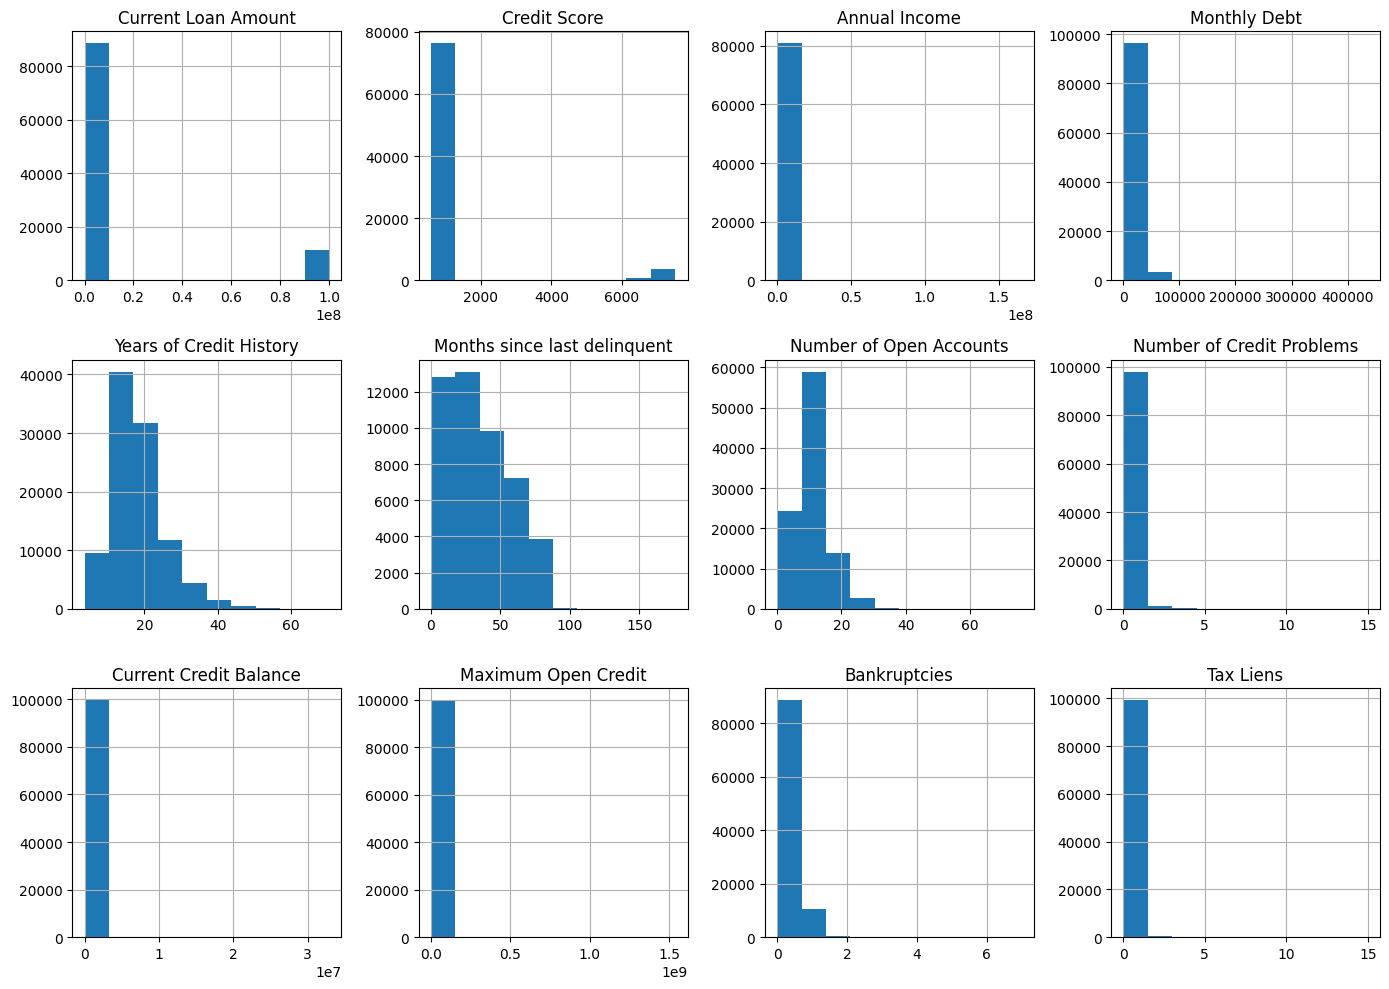

In [12]:
# Create histograms
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 10))  
df.hist(bins=10, ax=axes.flatten())

for ax in axes.flatten():
    ax.title.set_size(12)  

plt.tight_layout()
plt.show()


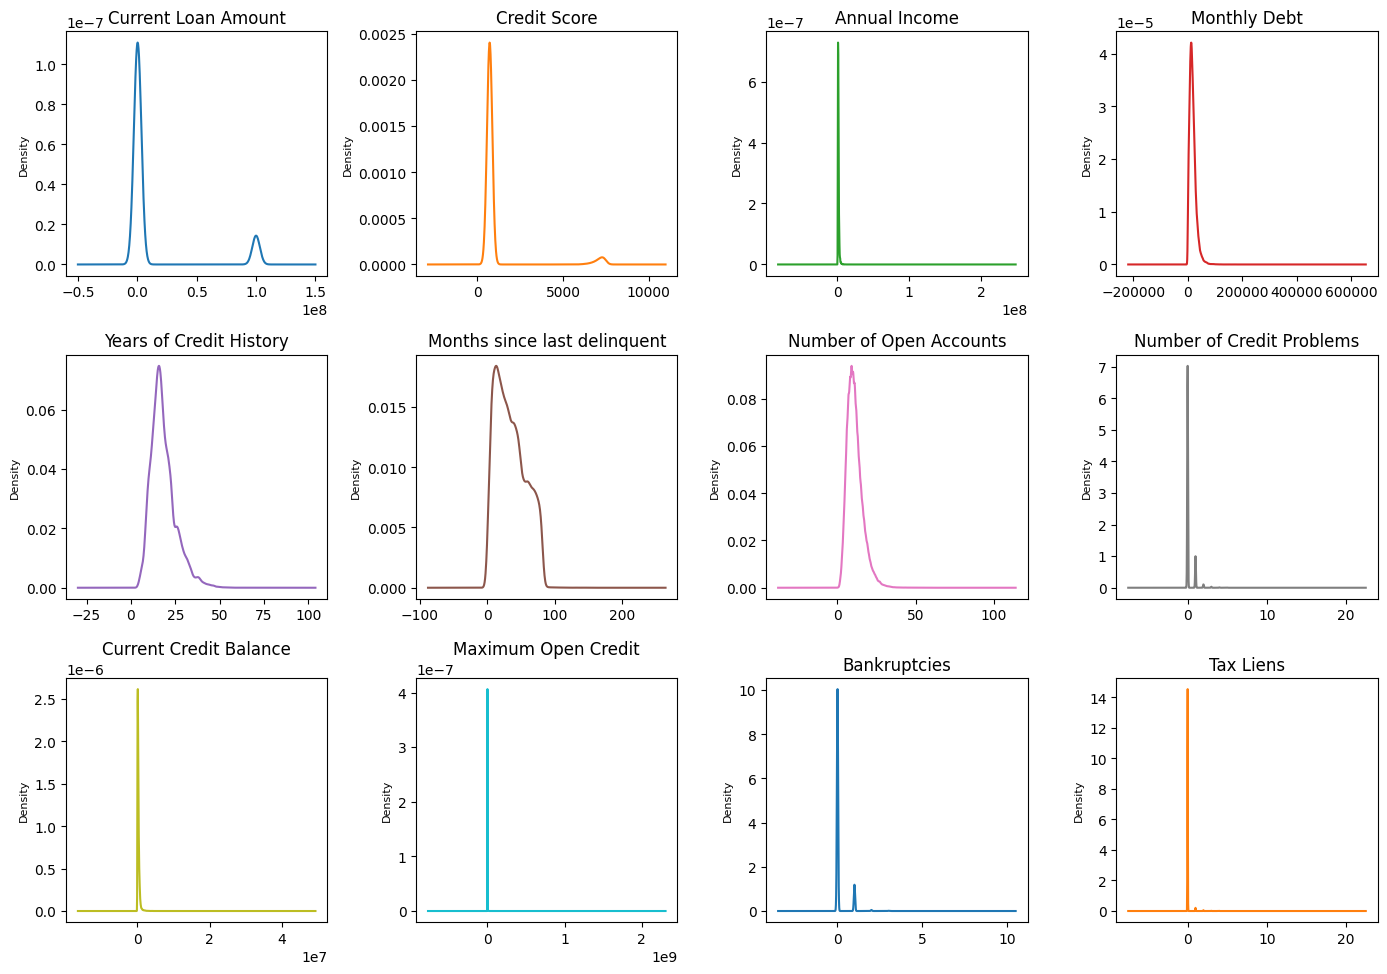

In [13]:
#Filter numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

#Creating density plots for numerical columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 10))  # Adjust the number of rows and columns as needed
df[numerical_columns].plot(kind='density', subplots=True, layout=(3, 4), sharex=False, legend=False, ax=axes.flatten())

for ax, col in zip(axes.flatten(), numerical_columns):
    ax.set_xlabel(ax.get_xlabel(), fontsize=8) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) 
    ax.set_title(col, fontsize=12)  

plt.tight_layout()
plt.show()


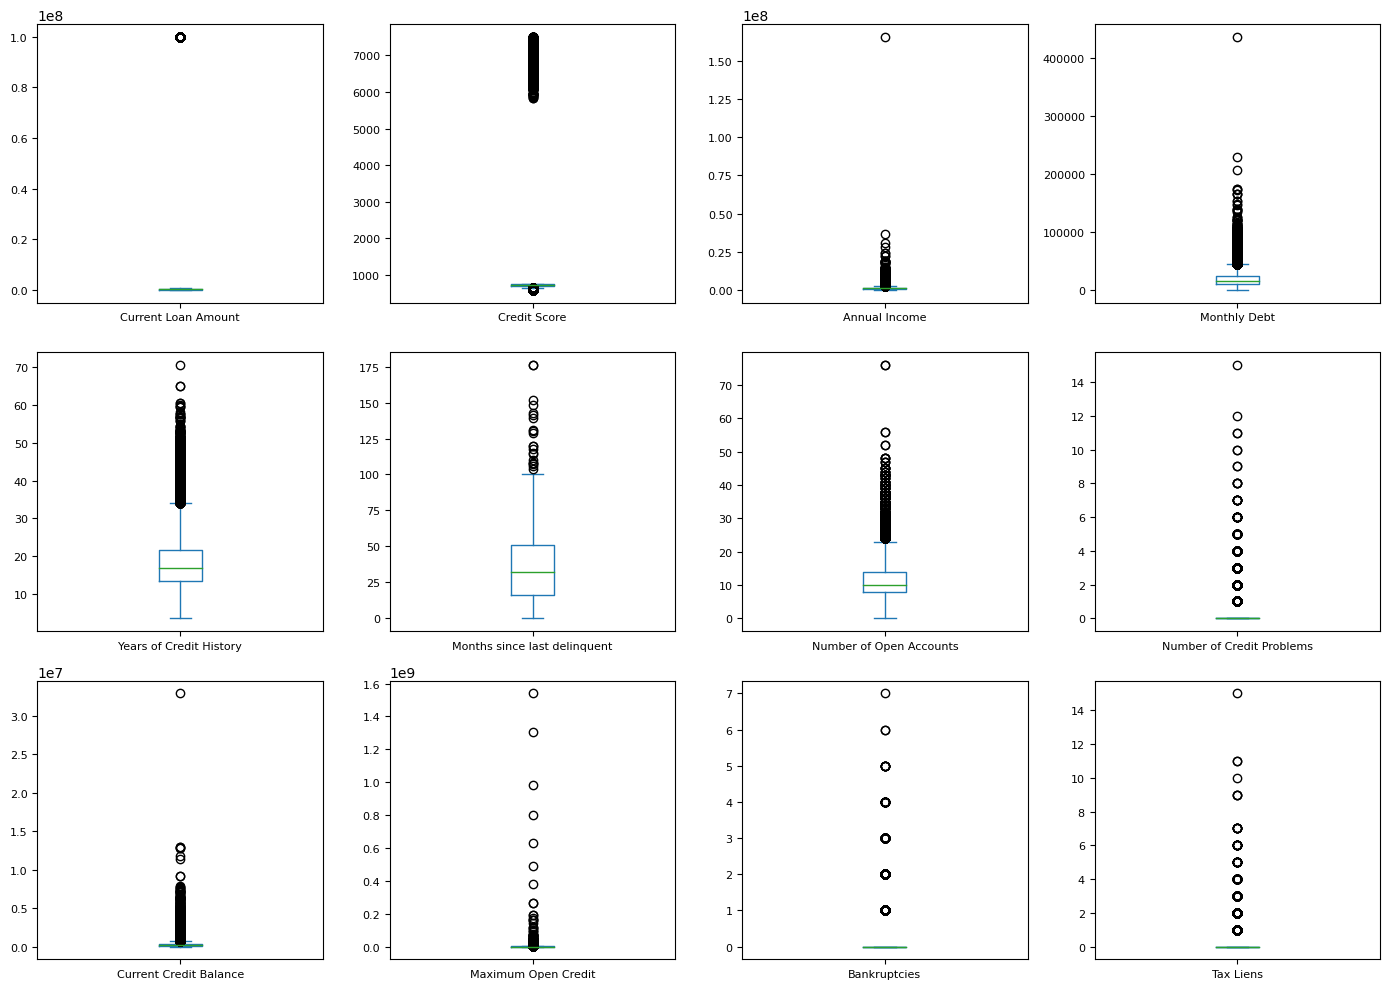

In [14]:
# Creating box and whisker plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 10))  
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, ax=axes.flatten())

for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=8) 
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  

plt.tight_layout()
plt.show()


So, as seen in boxplot, there are outliers that need to be taken care of

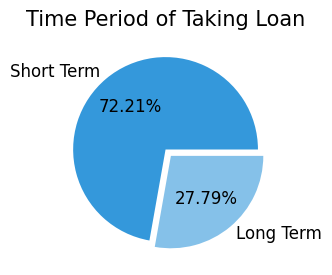

In [15]:
# Defining custom colors
colors = ['#3498db', '#85c1e9']

# Creating pie chart for 'Term' column
plt.figure(figsize=(3, 3))
plt.pie(x=original_df['Term'].value_counts(),
        labels=['Short Term', 'Long Term'],
        autopct='%.2f%%',
        textprops={'fontsize': 12},
        explode=[0, 0.09],
        colors=colors)  # Apply custom colors here
plt.title('Time Period of Taking Loan', fontdict={'fontsize': 15})
plt.show()


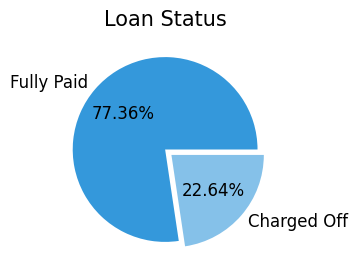

In [16]:
# Create pie chart for loan status column
plt.figure(figsize=(3, 3))
plt.pie(x=original_df['Loan Status'].value_counts(),
        labels=['Fully Paid', 'Charged Off'],
        autopct='%.2f%%',
        textprops={'fontsize': 12},
        explode=[0, 0.09],
        colors=colors)  # Apply custom colors here
plt.title('Loan Status', fontdict={'fontsize': 15})
plt.show()


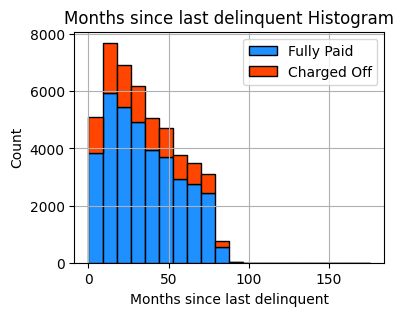

In [17]:
'''plotting months since last delinquency count by loan status'''
# First I separate data by loan status
fully_paid_data = original_df[original_df['Loan Status'] == 'Fully Paid']['Months since last delinquent']
charged_off_data = original_df[original_df['Loan Status'] == 'Charged Off']['Months since last delinquent']

# Plot Stacked histograms
plt.figure(figsize=(4,3))
plt.hist([fully_paid_data, charged_off_data], bins=20, stacked=True, color=['dodgerblue', 'orangered'], edgecolor='black', label=['Fully Paid', 'Charged Off'])
plt.xlabel('Months since last delinquent')
plt.ylabel('Count')
plt.title('Months since last delinquent Histogram')
plt.legend()
plt.grid(True)
plt.show()


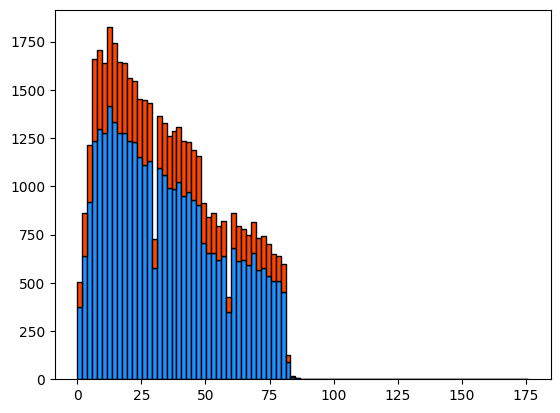

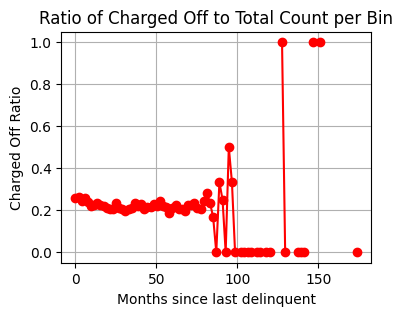

In [18]:
'''
Now, I would like to see ratio of loans charged off, in terms of months of delinquency. 
So, we plot the following.
'''
# Separate data by loan status
fully_paid_data = original_df[original_df['Loan Status'] == 'Fully Paid']['Months since last delinquent']
charged_off_data = original_df[original_df['Loan Status'] == 'Charged Off']['Months since last delinquent']

n, bins, _ = plt.hist([fully_paid_data, charged_off_data], bins='auto', stacked=True, color=['dodgerblue', 'orangered'], edgecolor='black', label=['Fully Paid', 'Charged Off'])

#Here, n gives an array where each row is the lenght of each type for each bin
# Calculate ratio of Charged Off to total count per bin
charged_off_ratio = (n[1]-n[0]) / (n[1])

# Plot 
plt.figure(figsize=(4,3), dpi=100) 
plt.plot(bins[:-1], charged_off_ratio, marker='o', color='red', linestyle='-')
plt.xlabel('Months since last delinquent')
plt.ylabel('Charged Off Ratio')
plt.title('Ratio of Charged Off to Total Count per Bin')
plt.grid(True)
plt.show()

No obvious relationship found between months since last delinquency and defaulting of loans.

In [19]:
grouped = df.groupby('Tax Liens')['Annual Income'].mean()
grouped = df.groupby('Tax Liens')['Annual Income'].std()
grouped

Tax Liens
0.0     1.073336e+06
1.0     1.192050e+06
2.0     1.216338e+06
3.0     1.644949e+06
4.0     3.950345e+06
5.0     1.100507e+06
6.0     9.961136e+05
7.0     5.252697e+05
9.0     1.946736e+04
10.0             NaN
11.0    0.000000e+00
15.0             NaN
Name: Annual Income, dtype: float64

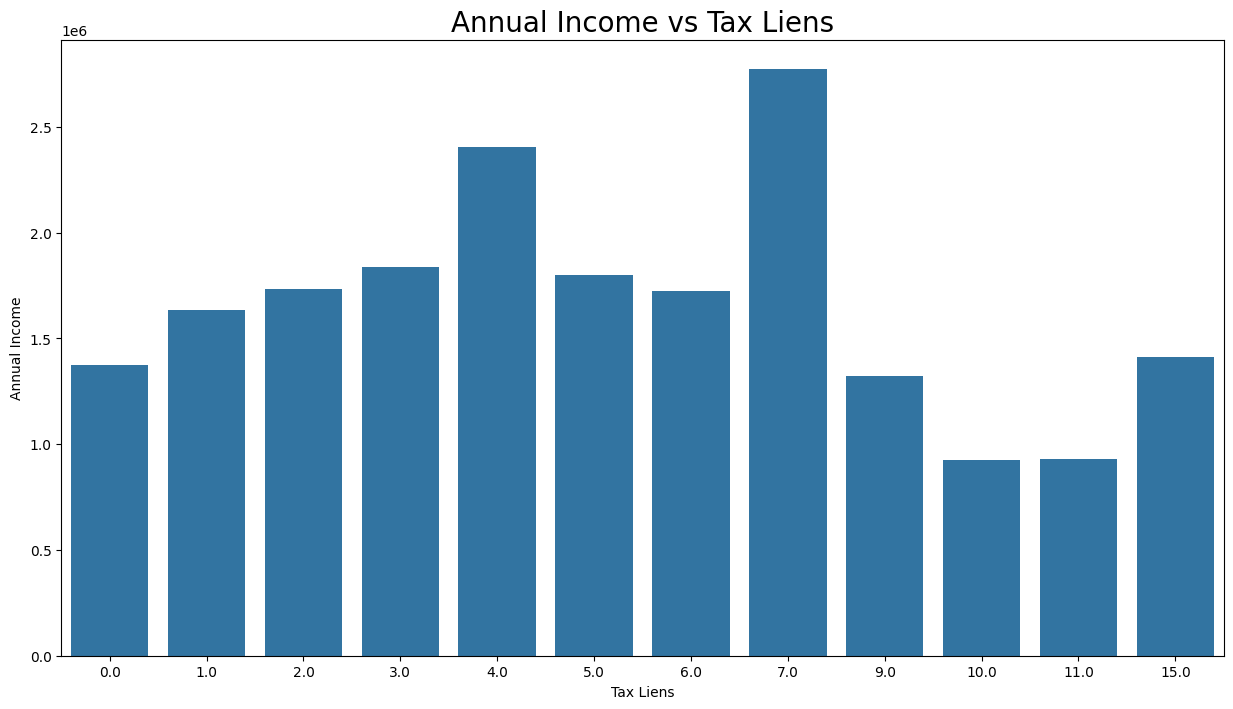

In [20]:
#Plotting mean of 'Monthly Debt' for each Tax liens committed and plotting the same. 
plt.figure(figsize=(15,8))
sns.barplot(x=df['Tax Liens'],y=original_df['Annual Income'], ci=None) 
plt.title('Annual Income vs Tax Liens',fontdict={'fontsize':20})
plt.show()

# Cleaning the data

## Outlier handling

### Credit Score 

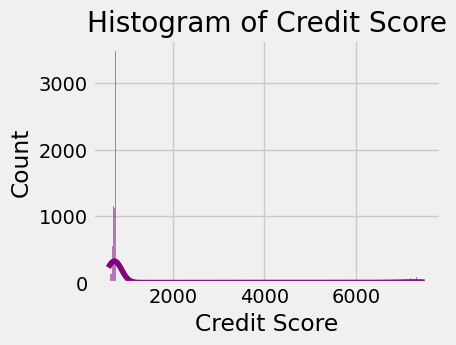

In [21]:
#Plotting the histogram of values in credit score column
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 3)) 
sns.histplot(data=df, x='Credit Score', kde=True, bins='auto', color='purple')
plt.title('Histogram of Credit Score')
plt.show()


Credit Score ranges from 300-850 but our data has unusually high scores, so first we will see how is the distribution

Text(0.5, 1.0, 'Box Plot of Credit Score')

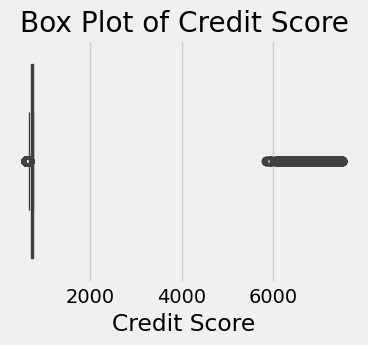

In [22]:
#Plotting box plot for Credit Score
plt.figure(figsize=(4, 3)) 
sns.boxplot(x=df['Credit Score'])
plt.title('Box Plot of Credit Score')

In [23]:
#Let's see what type of values one observes above maximum(Q4) of bos plot
Q1 = df['Credit Score'].quantile(0.25)
Q3 = df['Credit Score'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

outliers_credit_score = df[df['Credit Score']>Q4]['Credit Score']
outliers_credit_score 

5        7290.0
43       7120.0
51       6610.0
56       7380.0
65       7370.0
          ...  
99851    7420.0
99872    7070.0
99906    6880.0
99944    6790.0
99947    6940.0
Name: Credit Score, Length: 4551, dtype: float64

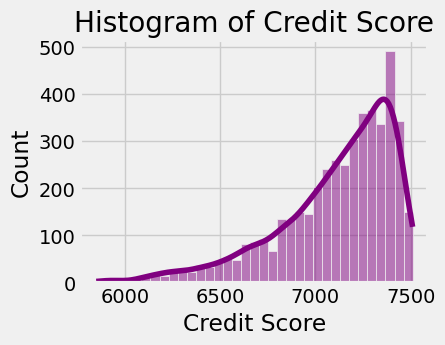

In [24]:
#Plotting the histogram of values in credit score column greater than Q4
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 3)) 
sns.histplot(data=df[df['Credit Score']>Q4], x='Credit Score', kde=True, bins='auto', color='purple')
plt.title('Histogram of Credit Score')
plt.show()


Credit scores are within 300-900.
Here, we see that some values are unnecessarily multiplied by 10, we divide them by 10 to bring credit scores within resonable range

In [25]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: x/10 if x>1000 else x)

Text(0.5, 1.0, 'Credit Score Box Plot')

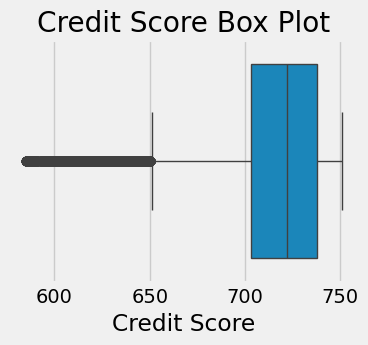

In [26]:
#Plotting box plot again
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Credit Score'])
plt.title('Credit Score Box Plot')

Our credit score is within range

### Current Loan Amount 

Text(0.5, 1.0, 'Current Loan Amount Histogram')

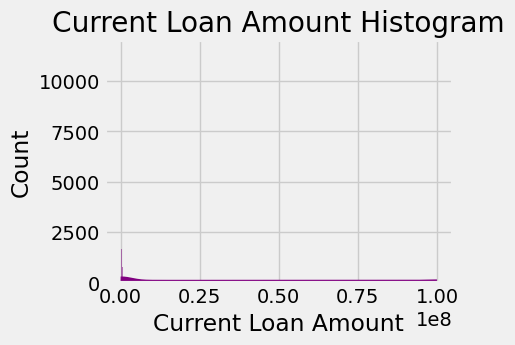

In [27]:
#Plotting the histogram of values of current loan column
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Current Loan Amount', kde=True, bins='auto', color='purple')  
plt.title('Current Loan Amount Histogram')

Text(0.5, 1.0, 'Current Loan Amount Box Plot')

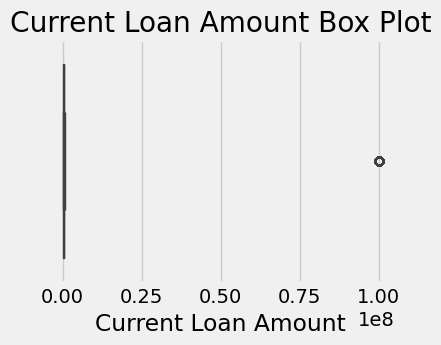

In [28]:
#Plot box plot
plt.figure(figsize=(4,3)) 
sns.boxplot(x=df['Current Loan Amount'])
plt.title('Current Loan Amount Box Plot')

In [29]:
#Let's see what type of values one observes above maximum(Q4) of bos plot
Q1 = df['Current Loan Amount'].quantile(0.25)
Q3 = df['Current Loan Amount'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

outliers_current_loan = df[df['Current Loan Amount']>Q4]['Current Loan Amount']
outliers_current_loan.value_counts()
#One can see that, arbitrary values are put in some cells of 'Current Loan Amount' column

Current Loan Amount
99999999    11484
Name: count, dtype: int64

In [30]:
#We replace these arbitrary values by mean of rest of the data
mean_current_loan = df[df['Current Loan Amount']!=99999999]['Current Loan Amount'].mean()
df['Current Loan Amount'] = df['Current Loan Amount'].apply(lambda x: mean_current_loan if x==99999999 else x)

Text(0.5, 1.0, 'Current Loan Amount Histogram')

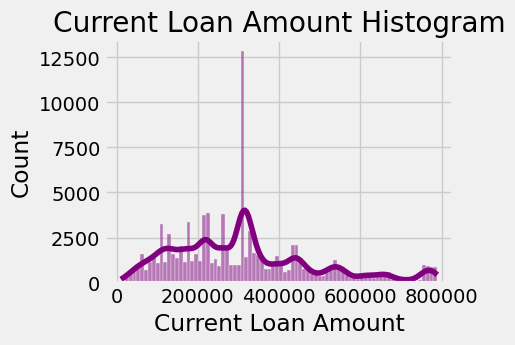

In [31]:
#Plotting the histogram of values of current loan column
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Current Loan Amount', kde=True, bins='auto', color='purple')  
plt.title('Current Loan Amount Histogram')

Text(0.5, 1.0, 'Current Loan Amount Box Plot')

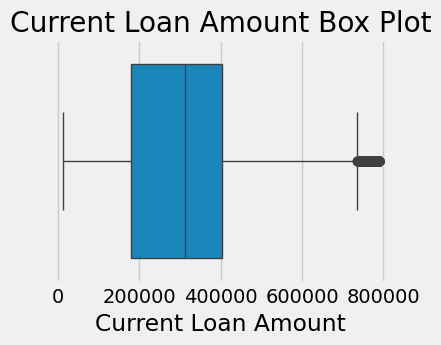

In [32]:
#Plot box plot
plt.figure(figsize=(4,3)) 
sns.boxplot(x=df['Current Loan Amount'])
plt.title('Current Loan Amount Box Plot')

Reasonable values observed now, so we move to the next column

### Annual Income 

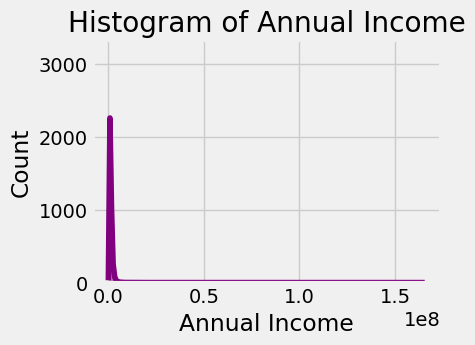

In [33]:
#Plotting the histogram of values of Annual Income
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Annual Income', kde=True, bins='auto', color='purple')  
plt.title('Histogram of Annual Income')
plt.show()


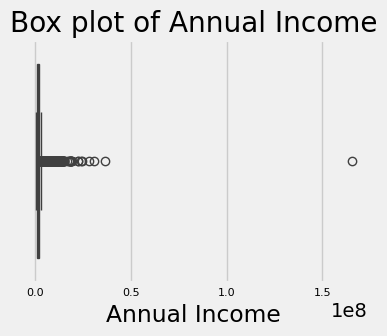

In [34]:
# Create boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Annual Income'])
plt.xticks(fontsize=8)
plt.title('Box plot of Annual Income')
plt.show()


In [35]:
#Checking values above the maximum(Q4) of our box plot which usually account for our outliers
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

#Checking income levels above our maximum(Q4) in descending order 
pd.DataFrame(df[df['Annual Income']>Q4]['Annual Income'].sort_values(ascending=False)) 

,Annual Income
85662,165557393.0
37858,36475440.0
10721,30838995.0
58682,28095300.0
21598,24161540.0
...,...
47692,2853990.0
42401,2853990.0
46640,2853914.0
54951,2853895.0


Reasonable values, so not changing them

### Years in current job

In [36]:
#This is a categorical column so let's see unique values in it
df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

We will change this to numerical values

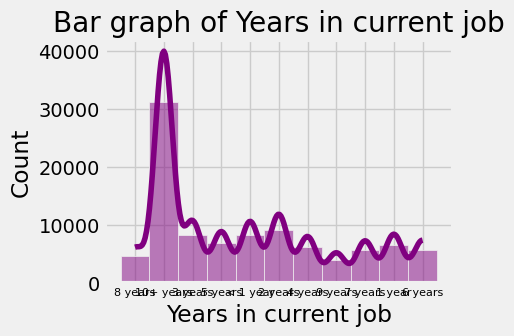

In [37]:
#Plotting bar graph of the column
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Years in current job', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.title('Bar graph of Years in current job')
plt.show()


In [38]:
#We now change the categorical values to numerical
#Defining mappings for categories
year_mappings = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

# Replace categories with numerical values
df['Years in current job'] = df['Years in current job'].replace(year_mappings)

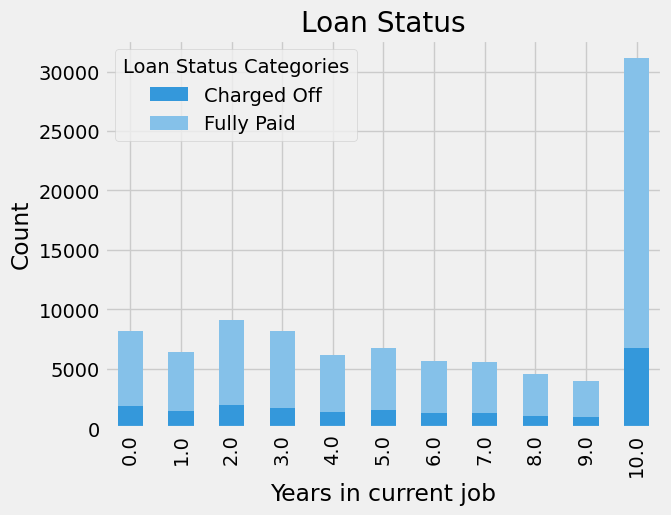

In [39]:
# I want to observe whether people with less experience default more 
grouped = df.groupby('Years in current job')['Loan Status'].value_counts().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Years in current job')
plt.ylabel('Count')
plt.title('Loan Status')
plt.legend(title='Loan Status Categories')
plt.show()


It is not true that people with less experience will default more and thus I change will now change these years in intervals (0-5), (5-10) and 10+ years. 

In [40]:
#Before that, we will have to fill the missing valus in 'Years in current job' column
#I will fill it with the median value
median_years = df['Years in current job'].median()
df['Years in current job'].fillna(median_years, inplace=True)

In [41]:
# Now we divide our values in 3 different intervals as discussed 
# Define the bin edges and labels
bin_edges = [-1, 5, 10, float('inf')]  # Define the bin edges
bin_labels = ['0-5 years', '5-10 years', '10+ years']  # Define the bin labels

# Using cut() function to bin the numerical values into categorical bins
df['Years in current job'] = pd.cut(df['Years in current job'], bins=bin_edges, labels=bin_labels, right=False)

In [42]:
print(df['Years in current job'])
print('---------------------------------------------------------------------------------')
print(df['Years in current job'].unique())

0        5-10 years
1         10+ years
2        5-10 years
3         0-5 years
4        5-10 years
            ...    
99995    5-10 years
99996     0-5 years
99997    5-10 years
99998    5-10 years
99999    5-10 years
Name: Years in current job, Length: 100000, dtype: category
Categories (3, object): ['0-5 years' < '5-10 years' < '10+ years']
---------------------------------------------------------------------------------
['5-10 years', '10+ years', '0-5 years']
Categories (3, object): ['0-5 years' < '5-10 years' < '10+ years']


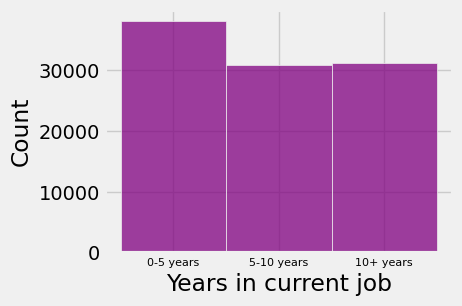

In [43]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Years in current job', kde=False, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()


Successfully converted to category. 

### Home Ownership

In [44]:
#Home Ownership is categorical, let's count unique values
df['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: count, dtype: int64

In [45]:
#Combine HaveMortgage with HomeMortgage
df['Home Ownership'] = df['Home Ownership'].str.replace('HaveMortgage','Home Mortgage')

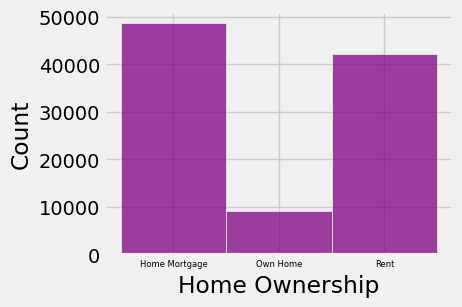

In [46]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 3)) 
sns.histplot(data=df, x='Home Ownership', kde=False, bins='auto', color='purple')  
plt.xticks(fontsize=6)
plt.show()


In [47]:
#Reasonable values, no outliers
#Convert to category type
df['Home Ownership'] = df['Home Ownership'].astype('category')

### Purpose

In [48]:
#Purpose is categorical, let's count unique values
df['Purpose'].value_counts()

Purpose
Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64

In [49]:
# 'Other' and 'other' are same so combine them
df.Purpose = df['Purpose'].str.replace('other','Other')
df['Purpose'].value_counts()

Purpose
Debt Consolidation      78552
Other                    9287
Home Improvements        5839
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64

Text(0.5, 1.0, 'Purpose of taking Loan')

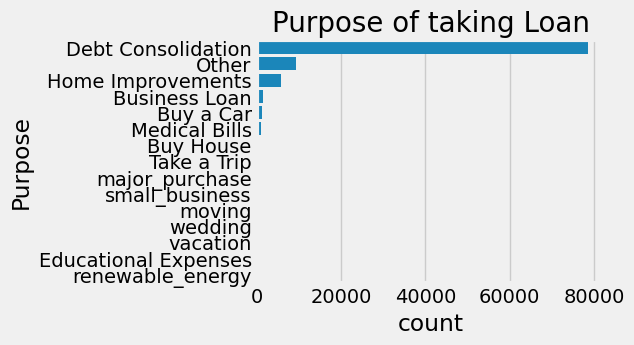

In [50]:
#Plotting the histogram of values 
plt.figure(figsize=(4,3))
sns.countplot(y='Purpose' , data=df, order = df['Purpose'].value_counts().index)
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})

Reasonable values, we move to the next feature

### Monthly Debt

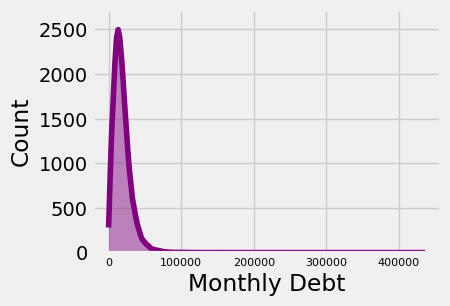

In [51]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Monthly Debt', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

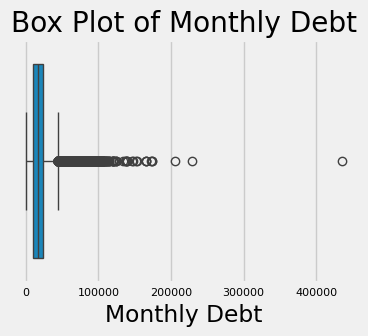

In [52]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Monthly Debt'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Monthly Debt')
plt.show()

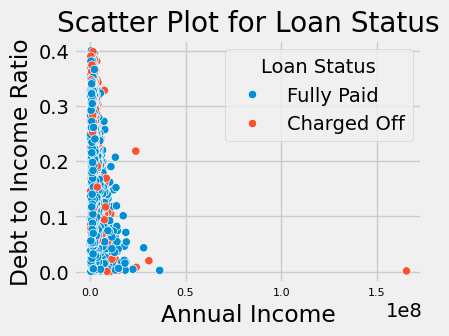

In [53]:
#Debt to income ratio is used in industry to assess borrower's loan payment ability, let's see if we find something interesting
plt.figure(figsize=(4,3))
ax = sns.scatterplot(y=(12*df['Monthly Debt'])/df['Annual Income'], x=df['Annual Income'], hue =df['Loan Status'])
ax.set(xlabel='Annual Income', ylabel='Debt to Income Ratio')
plt.title('Scatter Plot for Loan Status')
plt.xticks(fontsize=8)
plt.show()

Okay, so there is no clear relationship between Debt to Income Ratio and Annual income

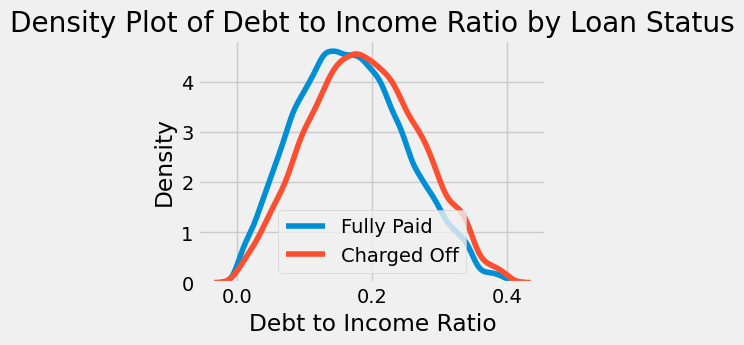

In [54]:
# Let's create density plots of debt to income ratio for the loan status categories
plt.figure(figsize=(4,3))
sns.kdeplot((12*df[df['Loan Status'] == 'Fully Paid']['Monthly Debt']) / df[df['Loan Status'] == 'Fully Paid']['Annual Income'], label='Fully Paid')
sns.kdeplot((12*df[df['Loan Status'] == 'Charged Off']['Monthly Debt']) / df[df['Loan Status'] == 'Charged Off']['Annual Income'], label='Charged Off')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Debt to Income Ratio by Loan Status')
plt.legend()
plt.show()


Not a definitive evidence but we see that customers with high debt to income ratio are more likely to default

In [55]:
#Checking values above the maximum(Q4) of our box plot which usually account for our outliers
Q1 = df['Monthly Debt'].quantile(0.25)
Q3 = df['Monthly Debt'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

df[df['Monthly Debt']>Q4].sort_values(by=['Monthly Debt'], ascending=False)

,Loan ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
25003,L-18553-88177a-12bsdc-aa-25004,Charged Off,350416.0,Long Term,733.0,23980375.0,0-5 years,Home Mortgage,Debt Consolidation,435843.28,19.2,NaN,10,0,925794,1288430.0,0.0,0.0
77687,L-18553-88177a-12bsdc-aa-77688,Fully Paid,768768.0,Short Term,694.0,13278720.0,0-5 years,Rent,Debt Consolidation,229057.92,33.5,70.0,14,3,1207127,1715010.0,0.0,3.0
15837,L-18553-88177a-12bsdc-aa-15838,Charged Off,762850.0,Short Term,732.0,7529320.0,10+ years,Home Mortgage,Other,205801.35,32.5,NaN,28,0,32878968,98627914.0,0.0,0.0
45952,L-18553-88177a-12bsdc-aa-45953,Fully Paid,780780.0,Long Term,712.0,10943088.0,10+ years,Home Mortgage,Debt Consolidation,173265.56,24.2,NaN,15,0,9134592,10836980.0,0.0,0.0
27289,L-18553-88177a-12bsdc-aa-27290,Fully Paid,780780.0,Long Term,712.0,10943088.0,10+ years,Home Mortgage,Debt Consolidation,173265.56,24.2,NaN,15,0,9134592,10836980.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10126,L-18553-88177a-12bsdc-aa-10127,Fully Paid,624030.0,Long Term,NaN,NaN,0-5 years,Home Mortgage,Debt Consolidation,44733.22,14.5,64.0,17,0,253555,1019436.0,0.0,0.0
7318,L-18553-88177a-12bsdc-aa-7319,Fully Paid,593494.0,Long Term,737.0,2323472.0,5-10 years,Rent,Debt Consolidation,44726.57,12.7,56.0,16,0,69730,568524.0,0.0,0.0
88882,L-18553-88177a-12bsdc-aa-88883,Fully Paid,759506.0,Short Term,NaN,NaN,0-5 years,Home Mortgage,Home Improvements,44726.00,18.4,NaN,17,0,459458,1049312.0,0.0,0.0
48174,L-18553-88177a-12bsdc-aa-48175,Fully Paid,789184.0,Long Term,716.0,1596798.0,0-5 years,Home Mortgage,Debt Consolidation,44710.23,28.5,NaN,15,0,921139,1760044.0,0.0,0.0


There are outliers but the values are not too extreme so leaving it as it is. If model doesn't work as intended, will come back to modify

### Years of Credit History

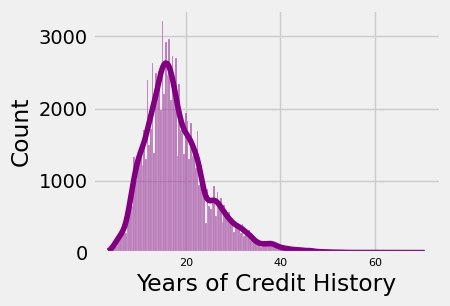

In [56]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Years of Credit History', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

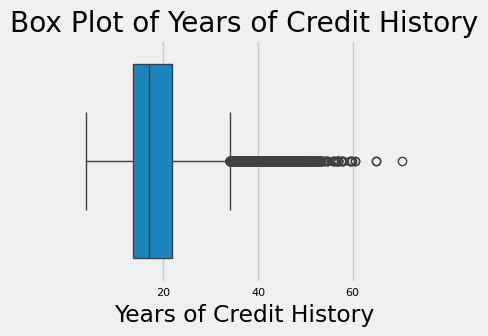

In [57]:
# Create boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Years of Credit History'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Years of Credit History')
plt.show()

In [58]:
df['Years of Credit History'].describe()

count    100000.000000
mean         18.199141
std           7.015324
min           3.600000
25%          13.500000
50%          16.900000
75%          21.700000
max          70.500000
Name: Years of Credit History, dtype: float64

In [59]:
#Checking values above the maximum(Q4) of our box plot which usually account for our outliers
Q1 = df['Years of Credit History'].quantile(0.25)
Q3 = df['Years of Credit History'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

outliers_monthly_debt = df[df['Years of Credit History'] > Q4]['Years of Credit History']
outliers_monthly_debt.sort_values(ascending=False)

30310    70.5
13715    65.0
53098    65.0
65460    60.5
40312    60.5
         ... 
69116    34.1
50927    34.1
53121    34.1
76657    34.1
15673    34.1
Name: Years of Credit History, Length: 3089, dtype: float64

The values are unusually high so we shift all the values above the maximum of box plot on the maximum(Q4), i.e. to the less extreme values

In [60]:
# Replace values greater than Q4 with Q4
df.loc[df['Years of Credit History'] > Q4, 'Years of Credit History'] = Q4

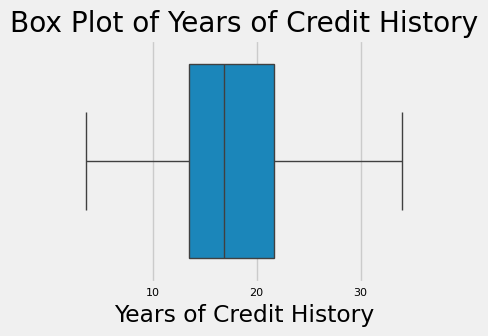

In [61]:
# Create boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Years of Credit History'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Years of Credit History')
plt.show()

Values are within reasonable range

### Number of Open Accounts

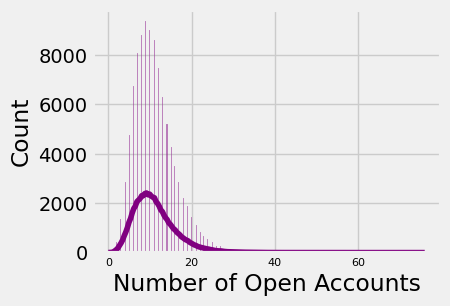

In [62]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Number of Open Accounts', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

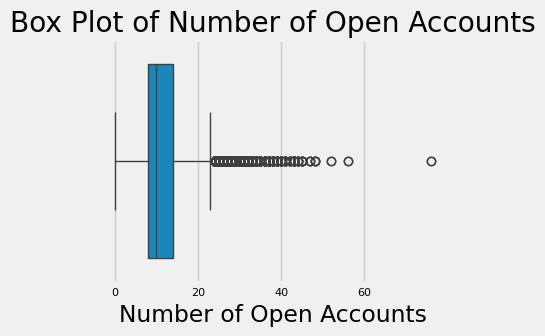

In [63]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Number of Open Accounts'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Number of Open Accounts')
plt.show()

In [64]:
#Values greater than maximum are considered outliers here
#we see that some values are unusually high so we put all the outliers on the box-plot on the maximum data value of the box-plot
Q1 = df['Number of Open Accounts'].quantile(0.25)
Q3 = df['Number of Open Accounts'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

df['Number of Open Accounts'] = df['Number of Open Accounts'].apply(lambda x: Q4 if x>Q4 else x)

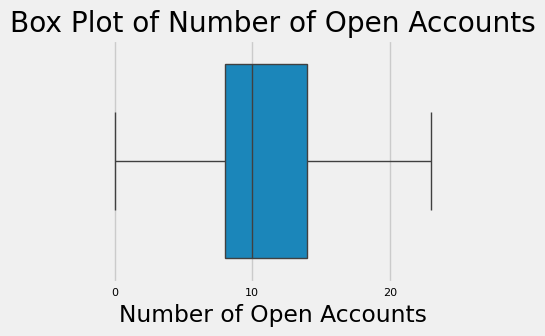

In [65]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Number of Open Accounts'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Number of Open Accounts')
plt.show()

In [66]:
#Outliers removed

### Number of Credit Problems

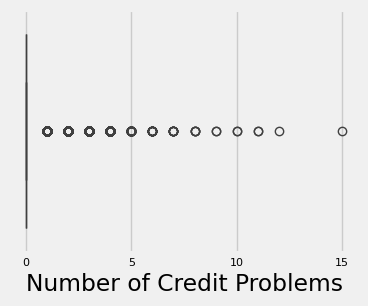

In [67]:
#Boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Number of Credit Problems'])
plt.xticks(fontsize=8)
plt.show()

In [68]:
#Reasonable values and could affect our prediction, leave unchanged

### Current Credit Balance

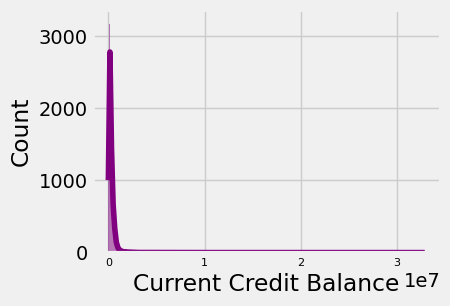

In [69]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Current Credit Balance', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

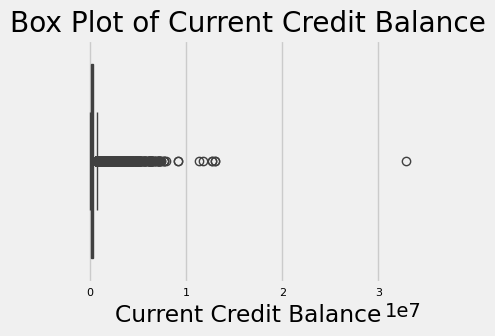

In [70]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Current Credit Balance'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Current Credit Balance')
plt.show()

In [71]:
#Values greater than maximum are considered outliers here
#we see that some values are unusually high so we put all the outliers on the box-plot on the maximum data value of the box-plot
Q1 = df['Current Credit Balance'].quantile(0.25)
Q3 = df['Current Credit Balance'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

df['Current Credit Balance'] = df['Current Credit Balance'].apply(lambda x: Q4 if x>Q4 else x)

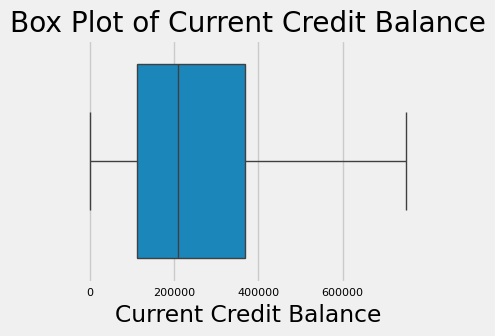

In [72]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Current Credit Balance'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Current Credit Balance')
plt.show()

### Maximum Open Credit

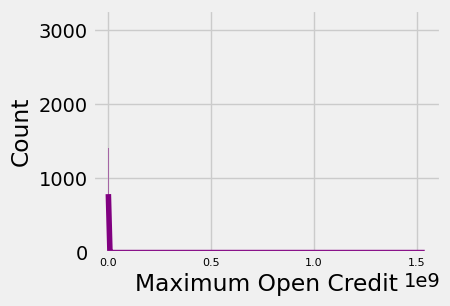

In [73]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Maximum Open Credit', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

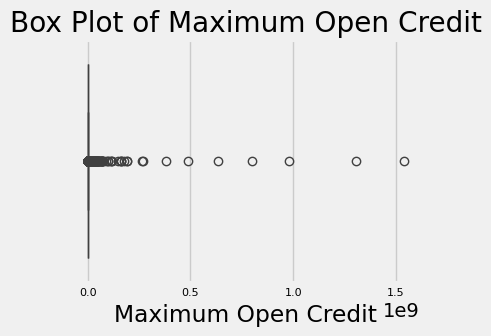

In [74]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Maximum Open Credit'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Maximum Open Credit')
plt.show()

In [75]:
#Values greater than maximum are considered outliers here
#we see that some values are unusually high so we put all the outliers on the box-plot on the maximum data value of the box-plot
Q1 = df['Maximum Open Credit'].quantile(0.25)
Q3 = df['Maximum Open Credit'].quantile(0.75)
IQR = Q3-Q1
Q4 = Q3 + 1.5 * IQR

df['Maximum Open Credit'] = df['Maximum Open Credit'].apply(lambda x: Q4 if x>Q4 else x)

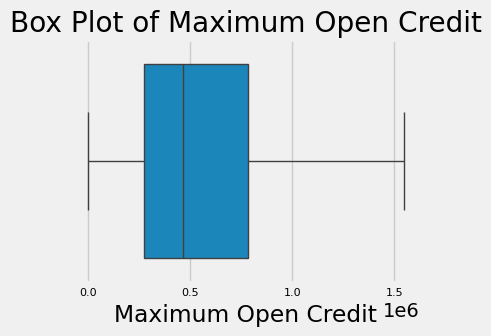

In [76]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Maximum Open Credit'])
plt.xticks(fontsize=8)
plt.title('Box Plot of Maximum Open Credit')
plt.show()

### Bankruptcies

In [77]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

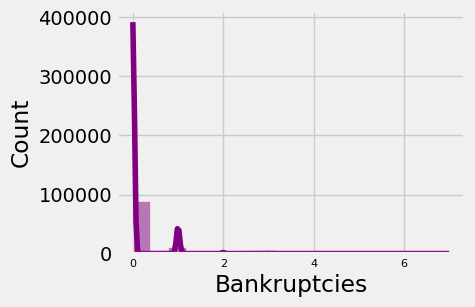

In [78]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Bankruptcies', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

In [79]:
#Reasonable outliers, doing nothing

### Tax Liens

In [80]:
df['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

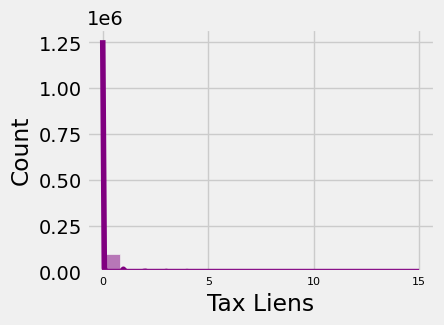

In [81]:
#Plotting the histogram of values 
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4,3)) 
sns.histplot(data=df, x='Tax Liens', kde=True, bins='auto', color='purple')  
plt.xticks(fontsize=8)
plt.show()

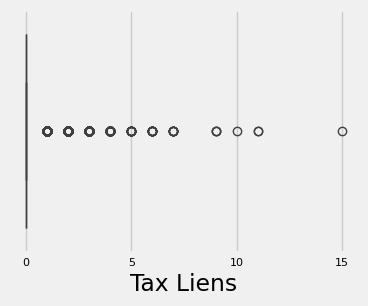

In [82]:
# Create the boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Tax Liens'])
plt.xticks(fontsize=8)
plt.show()

In [83]:
# There are outliers but they are useful as Taxliens could affect the model

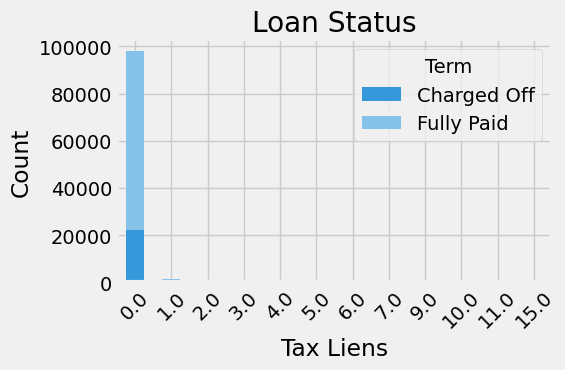

In [84]:
# Group the data by credit score and loan status, and count the occurrences
grouped_data = df.groupby(['Tax Liens', 'Loan Status']).size().unstack(fill_value=0)

# Plot the count of each loan status category for different credit scores
grouped_data.plot(kind='bar', stacked=True, figsize=(5,3), color=colors)
plt.title('Loan Status')
plt.xlabel('Tax Liens')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Term')
plt.show()


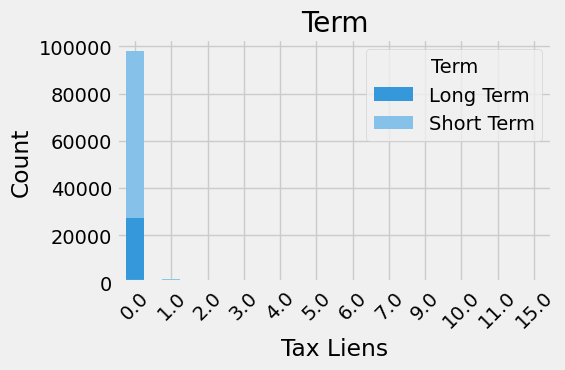

In [85]:
# Group the data by credit score and loan status, and count the occurrences
grouped_data = df.groupby(['Tax Liens', 'Term']).size().unstack(fill_value=0)

# Plot the count of each loan status category for different credit scores
grouped_data.plot(kind='bar', stacked=True, figsize=(5,3), color=colors)
plt.title('Term')
plt.xlabel('Tax Liens')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Term')
plt.show()


## Missing Data Handling

In [86]:
#Check total missing data
df.isnull().sum()

Loan ID                             0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [87]:
# Dropping 'Months since last delinquent' column for now as it has too many missing values (more than 50%)
# Dropping loan ID as well, obviously
#Will use median values for others

df = df.drop(columns=['Loan ID'])
df = df.drop(columns=['Months since last delinquent'])

# Remove rows with null values in 'Credit Score' and 'Annual Income'
#df = df.dropna(subset=['Credit Score', 'Annual Income'])

median_credit_score = df['Credit Score'].median()
df['Credit Score'] = df['Credit Score'].fillna(median_credit_score)

median_annual_income = df['Annual Income'].median()
df['Annual Income'] = df['Annual Income'].fillna(median_annual_income)


#As the number of missing values is so low in the 'Tax Liens' , 'Bankruptcies' and 'Maximum Open Credit' let's drop those rows

df.dropna(subset=["Maximum Open Credit"] , inplace = True)

df.dropna(subset=["Tax Liens"] , inplace = True)

df.dropna(subset=["Bankruptcies"] , inplace = True)

In [88]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

# Feature Engineering

## New Features

* Create Debt-to-income ratio as new column as it tells customers ability to make monthly payments

* Create Credit Utilization Ratio as new column that explains how much credit the customer has used

* Create 'Total Delinquencies' as sum of'Bankruptcies' and 'Tax Liens'

* We divide credit score into categories based on FICO Score (most widely used)-

    Very Poor: 300-579  

    Fair: 580-669

    Good: 670-739

    Very Good: 740-799

    Exceptional: 800-850
    
* Transform 'Home Ownership' column into two columns('Rent' and 'Mortgage') with binary labels only. We assume all customers have a house (maybe on rent, owned or mortgage). So, (1,0) means rent, (0,0) means house owned and (0,1) means mortgaged house. 

We will analyse performance with both cases : Keeping the original features and dropping the original features for new features.

In [89]:
# Create Debt-to-Income Ratio column
df['Debt-to-Income Ratio'] = df['Monthly Debt'] / df['Annual Income']

# Create Credit Utilization Ratio column
# Calculate the median of 'Maximum Open Credit'
median_max_open_credit = df['Maximum Open Credit'].median()
# Calculate the 'Credit Utilization Ratio' using np.where() to handle the case where 'Maximum Open Credit' is zero
df['Credit Utilization Ratio'] = np.where(df['Maximum Open Credit'] != 0, 
                                          df['Current Credit Balance'] / df['Maximum Open Credit'], 
                                          df['Current Credit Balance'] / median_max_open_credit)

# Create Number of Delinquencies column
df['Total Delinquencies'] = df['Bankruptcies'] + df['Tax Liens']

# Now we divide our credit score values in intervals as shown above
# Define the bin edges and labels
bin_edges = [299, 580, 670, 740, 800, float('inf')]  # Define the bin edges
bin_labels = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']  # Define the bin labels

# Use cut() function to bin the numerical values into categorical bins
df['Credit Score Category'] = pd.cut(df['Credit Score'], bins=bin_edges, labels=bin_labels, right=False)

#We now transform Home owner ship to rent and mortgage column
# Transform 'Home Ownership' to binary columns
df['Rent'] = (df['Home Ownership'] == 'Rent').astype(int)
df['Mortgage'] = (df['Home Ownership'] == 'Home Mortgage').astype(int)


# Data exploration and analysis with final features

In [90]:
#Final dataframe looks like these
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,...,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Debt-to-Income Ratio,Credit Utilization Ratio,Total Delinquencies,Credit Score Category,Rent,Mortgage
0,Fully Paid,445412.000000,Short Term,709.0,1167493.0,5-10 years,Home Mortgage,Home Improvements,5214.74,17.2,...,228190.0,416746.0,1.0,0.0,0.004467,0.547552,1.0,Good,0,1
1,Fully Paid,262328.000000,Short Term,722.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,...,229976.0,850784.0,0.0,0.0,0.028357,0.270311,0.0,Good,0,1
2,Fully Paid,312313.597881,Short Term,741.0,2231892.0,5-10 years,Own Home,Debt Consolidation,29200.53,14.9,...,297996.0,750090.0,0.0,0.0,0.013083,0.397280,0.0,Very Good,0,0
3,Fully Paid,347666.000000,Long Term,721.0,806949.0,0-5 years,Own Home,Debt Consolidation,8741.90,12.0,...,256329.0,386958.0,0.0,0.0,0.010833,0.662421,0.0,Good,0,0
4,Fully Paid,176220.000000,Short Term,722.0,1174162.0,5-10 years,Rent,Debt Consolidation,20639.70,6.1,...,253460.0,427174.0,0.0,0.0,0.017578,0.593341,0.0,Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.000000,Short Term,725.0,475437.0,5-10 years,Own Home,Other,2202.86,22.3,...,47766.0,658548.0,0.0,0.0,0.004633,0.072532,0.0,Good,0,0
99996,Fully Paid,312313.597881,Short Term,732.0,1289416.0,0-5 years,Rent,Debt Consolidation,13109.05,9.4,...,153045.0,509234.0,0.0,0.0,0.010167,0.300540,0.0,Good,1,0
99997,Fully Paid,103136.000000,Short Term,742.0,1150545.0,5-10 years,Rent,Debt Consolidation,7315.57,18.8,...,109554.0,537548.0,1.0,0.0,0.006358,0.203803,1.0,Very Good,1,0
99998,Fully Paid,530332.000000,Short Term,746.0,1717524.0,5-10 years,Rent,Debt Consolidation,9890.07,15.0,...,404225.0,738254.0,0.0,0.0,0.005758,0.547542,0.0,Very Good,1,0


In [91]:
df.dtypes

Loan Status                    object
Current Loan Amount           float64
Term                           object
Credit Score                  float64
Annual Income                 float64
Years in current job         category
Home Ownership               category
Purpose                        object
Monthly Debt                  float64
Years of Credit History       float64
Number of Open Accounts       float64
Number of Credit Problems       int64
Current Credit Balance        float64
Maximum Open Credit           float64
Bankruptcies                  float64
Tax Liens                     float64
Debt-to-Income Ratio          float64
Credit Utilization Ratio      float64
Total Delinquencies           float64
Credit Score Category        category
Rent                            int64
Mortgage                        int64
dtype: object

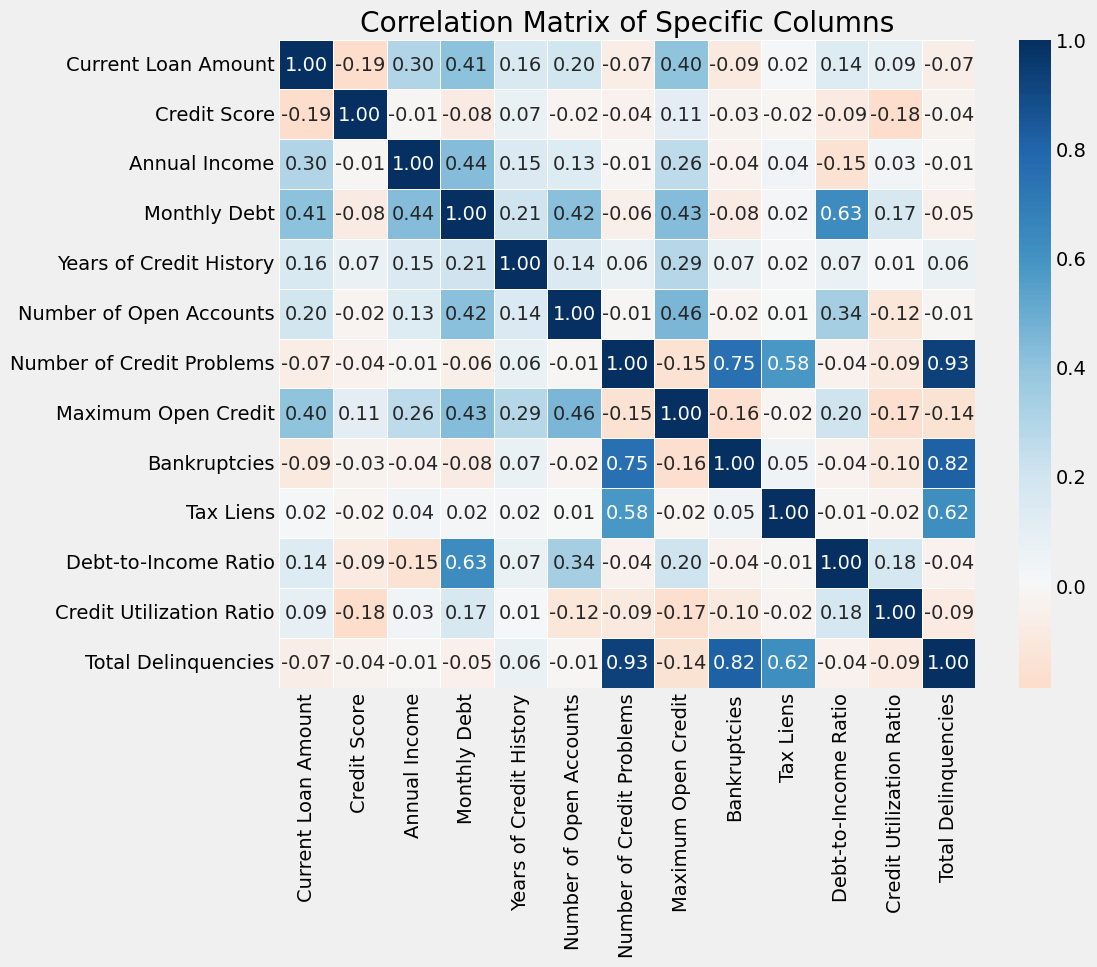

In [92]:
# Select specific columns from your DataFrame
specific_columns = df[['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
                      'Number of Credit Problems', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Debt-to-Income Ratio', 'Credit Utilization Ratio', 
                      'Total Delinquencies']]

# Calculate the correlation matrix
correlation_matrix = specific_columns.corr()

#plot it
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix of Specific Columns')
plt.show()


We could drop, 'Number of Credit Problems, Bankruptcies column as they are highly related with 'Number of Delinquencies'

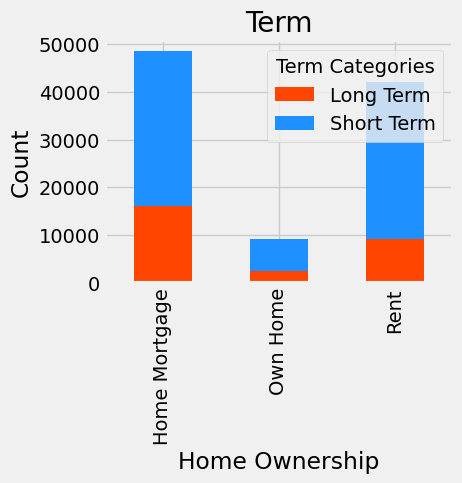

In [93]:
'''
Plotting Home Ownership count as stacked bargraph with term categories
'''

# I am using these custom colors
colors = ['orangered', 'dodgerblue']  

# Plot
grouped = df.groupby('Home Ownership')['Term'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, color=colors,figsize=(4, 3))
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Term')
plt.legend(title='Term Categories')
plt.show()

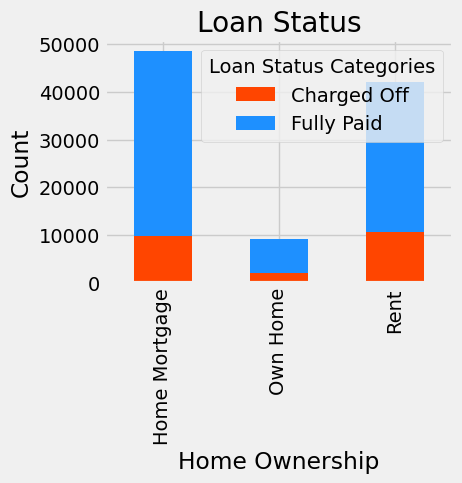

In [94]:
'''
Plotting Home Ownership count as stacked bargraph with loan status
'''
# Plot
grouped = df.groupby('Home Ownership')['Loan Status'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, color=colors,figsize=(4, 3))
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Loan Status')
plt.legend(title='Loan Status Categories')
plt.show()

We see no relationship between home ownership type on the trend of type of loan term and whether they'd default

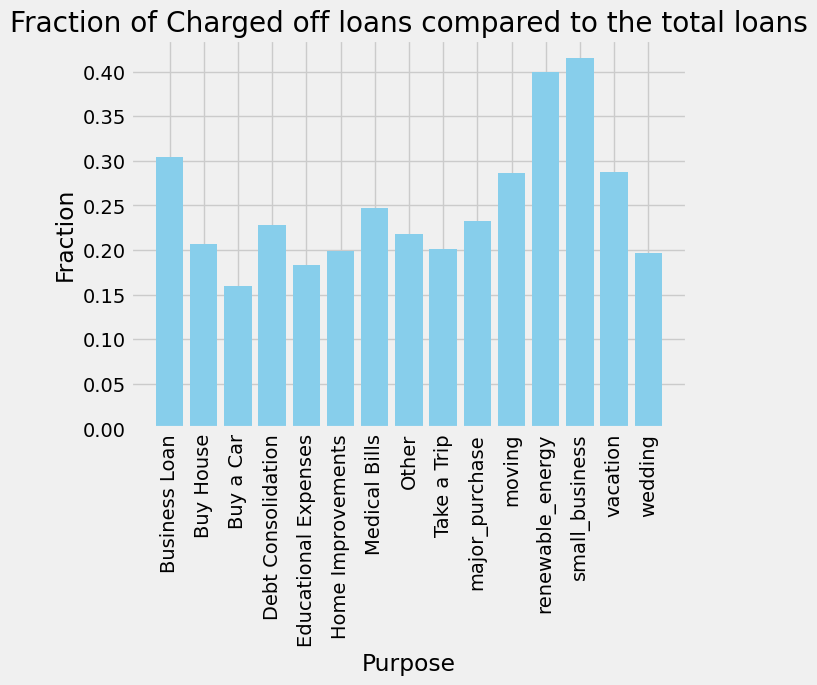

In [95]:
'''
Now, I would like to see which type of loans were mainly charged off, in terms of purpose. 
So, we plot the following.
'''

#Group by purpose
grouped = df.groupby('Purpose')['Loan Status'].value_counts().unstack(fill_value=0)

#Fraction of Charged off loans compared to total loans given to the group
t = pd.DataFrame(grouped['Charged Off']/(grouped['Charged Off']+grouped['Fully Paid']), columns=['Ratio'])

# Plot histogram
x_values = t.index
y_values = t['Ratio']
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Purpose')
plt.ylabel('Fraction')
plt.title('Fraction of Charged off loans compared to the total loans')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


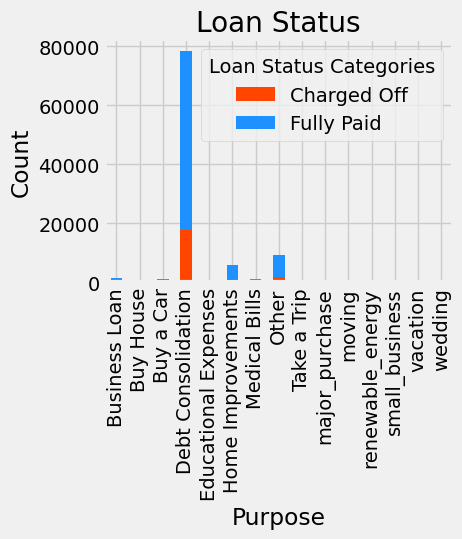

In [96]:
'''
Plotting Purpose count as stacked bargraph with loan status
'''
grouped = df.groupby('Purpose')['Loan Status'].value_counts().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', stacked=True, color=colors, figsize=(4,3))
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Loan Status')
plt.legend(title='Loan Status Categories')
plt.show()


We see that loans taken for renewable energy and business are more likely to be charged off but the data is scarce for these cases as can be seen in the next plot so, cannot conclude it definitely based on only this data.

Debt consodilation was the major purpose of taking loans.

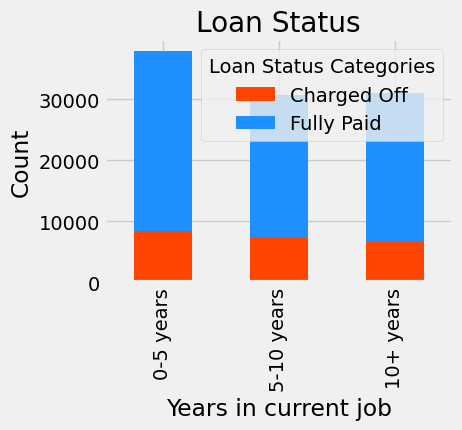

In [97]:
'''
Plotting 'years in current job' count as stacked bargraph with loan status
'''

grouped = df.groupby('Years in current job')['Loan Status'].value_counts().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', stacked=True, color=colors, figsize=(4,3))
plt.xlabel('Years in current job')
plt.ylabel('Count')
plt.title('Loan Status')
plt.legend(title='Loan Status Categories')
plt.show()


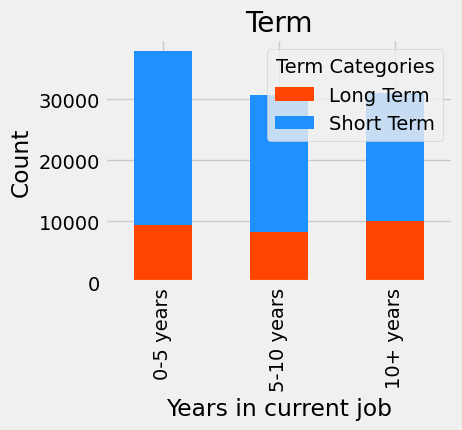

In [98]:
'''
Plotting 'years in current job' count as stacked bargraph with †erm
'''

grouped = df.groupby('Years in current job')['Term'].value_counts().unstack(fill_value=0)

# Plot
grouped.plot(kind='bar', stacked=True, color=colors, figsize=(4,3))
plt.xlabel('Years in current job')
plt.ylabel('Count')
plt.title('Term')
plt.legend(title='Term Categories')
plt.show()


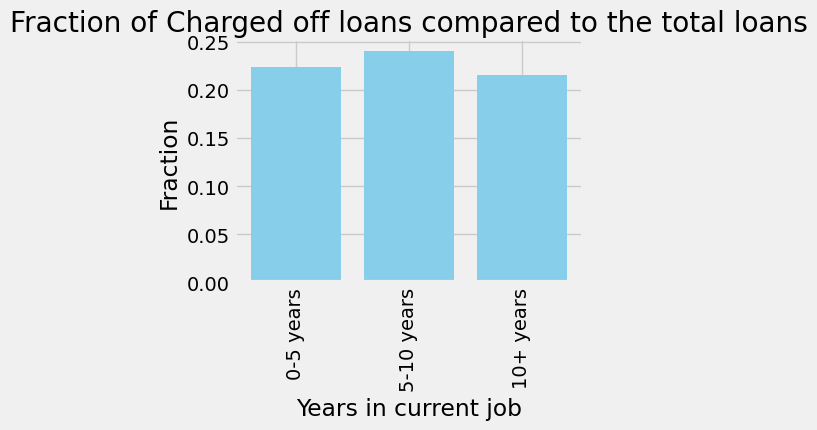

In [99]:
'''
Now, I would like to see ratio of loans charged off, in terms of years of experience. 
So, we plot the following.
'''

#Group by Years in current job
grouped = df.groupby('Years in current job')['Loan Status'].value_counts().unstack(fill_value=0)

#Fraction of Charged off loans compared to total loans given to the group
t = pd.DataFrame(grouped['Charged Off']/(grouped['Charged Off']+grouped['Fully Paid']), columns=['Ratio'])

# Plot histogram
x_values = t.index
y_values = t['Ratio']
plt.figure(figsize=(4,3))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Years in current job')
plt.ylabel('Fraction')
plt.title('Fraction of Charged off loans compared to the total loans')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Similar fraction of charged off loans is observed

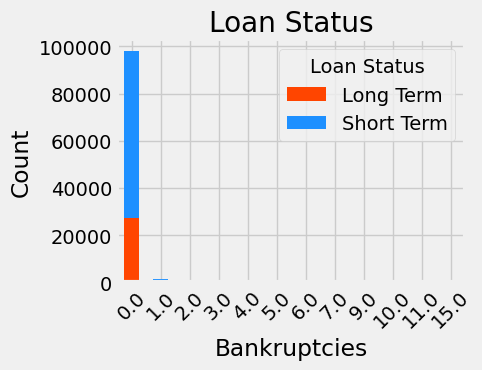

In [100]:
'''
Plotting 'Bankruptcies' count as stacked bargraph with loan status
'''
grouped = df.groupby('Bankruptcies')['Loan Status'].value_counts().unstack(fill_value=0)

# Plot 
grouped_data.plot(kind='bar', stacked=True, figsize=(4,3), color=colors)
plt.title('Loan Status')
plt.xlabel('Bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


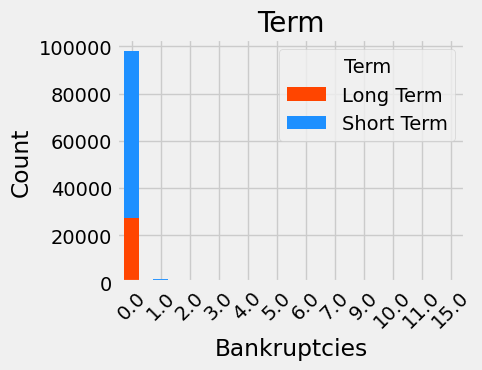

In [101]:
'''
Plotting 'Bankruptcies' count as stacked bargraph with term
'''

grouped = df.groupby('Bankruptcies')['Loan Status'].value_counts().unstack(fill_value=0)
# Plot 
grouped_data.plot(kind='bar', stacked=True, figsize=(4,3), color=colors)
plt.title('Term')
plt.xlabel('Bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Term')
plt.show()


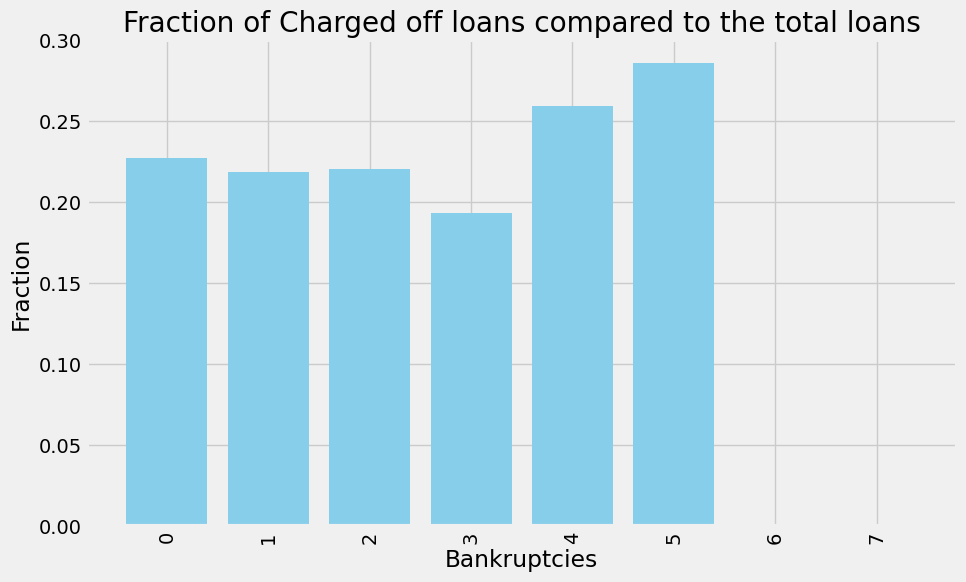

In [102]:
'''
Now, I would like to see ratio of loans charged off, in terms of bankruptcies. 
So, we plot the following.
'''

#Group by Years in current job
grouped = df.groupby('Bankruptcies')['Loan Status'].value_counts().unstack(fill_value=0)

#Fraction of Charged off loans compared to total loans given to the group
t = pd.DataFrame(grouped['Charged Off']/(grouped['Charged Off']+grouped['Fully Paid']), columns=['Ratio'])

# Plot histogram
x_values = t.index
y_values = t['Ratio']
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Bankruptcies')
plt.ylabel('Fraction')
plt.title('Fraction of Charged off loans compared to the total loans')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


Higher the bankruptcies, higher the fraction of loans charged off

# Model Selection and Training 1

In [103]:
#First, let's convert 'Loan Status' and 'Term' category labels into binary numbers (0 or 1)
# 0: Fully Paid, 1: Charge Off
df['Loan Status'] = df['Loan Status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
# 0: Short Term, 1: Long Term
df['Term'] = df['Term'].apply(lambda x: 1 if x=='Long Term' else 0)

In [104]:
df['Purpose'] = df['Purpose'].astype('category')

In [105]:
#Just checking if there are any null values
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Debt-to-Income Ratio         0
Credit Utilization Ratio     0
Total Delinquencies          0
Credit Score Category        0
Rent                         0
Mortgage                     0
dtype: int64

In [106]:
# Split-out validation dataset
X = df.drop(columns=['Loan Status', 'Home Ownership']) #Dropping Home Ownership column as we have created two equivalent columns alread (Rent & Mortgage)
Y = df['Loan Status']  #Target variable

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=0.2)

In [107]:
X.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Debt-to-Income Ratio', 'Credit Utilization Ratio',
       'Total Delinquencies', 'Credit Score Category', 'Rent', 'Mortgage'],
      dtype='object')

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Define column names and categories
numeric_columns = ["Current Loan Amount", "Annual Income", "Monthly Debt", 
                   "Years of Credit History", "Number of Open Accounts", 
                   "Number of Credit Problems", "Current Credit Balance", 
                   "Maximum Open Credit", "Bankruptcies", "Tax Liens", 
                   "Credit Score", "Total Delinquencies"]

categorical_columns = ["Years in current job", "Purpose"]
credit_score_categories = [['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']]
ordinal_columns = ["Credit Score Category"]
other_columns = ["Term", "Credit Utilization Ratio", "Debt-to-Income Ratio", "Rent", "Mortgage"]

# Define preprocessing pipelines
numeric_processor = Pipeline(steps=[("Scaler", StandardScaler())])
categorical_processor = Pipeline(steps=[("Encoder", TargetEncoder())])
ordinal_processor = Pipeline(steps=[("Ordinal Encoder", OrdinalEncoder(categories=credit_score_categories))])

# Define preprocessor
preprocessor = ColumnTransformer([
    ("numeric", numeric_processor, numeric_columns),
    ("categorical", categorical_processor, categorical_columns),
    ("ordinal", ordinal_processor, ordinal_columns),
    ("passthrough", "passthrough", other_columns)
])

# Define the main pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [109]:
# Fit and transform the training data
X_train_transformed = pipe.named_steps['preprocessor'].fit_transform(X_train, Y_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=numeric_columns + categorical_columns + ordinal_columns + other_columns)

X_train_transformed


,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score,Total Delinquencies,Years in current job,Purpose,Credit Score Category,Term,Credit Utilization Ratio,Debt-to-Income Ratio,Rent,Mortgage
0,0.426236,-0.173974,0.418427,1.144479,-0.223305,-0.347866,2.010847,2.405650,-0.333994,-0.113909,1.083071,-0.328855,0.240909,0.228824,3.0,0.0,0.432438,0.020333,0.0,1.0
1,-0.000465,0.383551,-0.054479,-0.726211,0.205449,-0.347866,-0.022947,0.419637,-0.333994,-0.113909,1.083071,-0.328855,0.217257,0.228824,3.0,1.0,0.348903,0.010333,1.0,0.0
2,-1.333313,-0.724791,-0.448581,-0.419540,-0.223305,-0.347866,-0.279052,-0.707443,-0.333994,-0.113909,0.022321,-0.328855,0.217257,0.228824,2.0,0.0,0.714248,0.021584,0.0,1.0
3,-0.000465,-0.275263,-0.084565,1.512484,-0.437682,-0.347866,0.199761,-0.240493,-0.333994,-0.113909,-0.881280,-0.328855,0.224289,0.203599,2.0,1.0,0.634792,0.016500,0.0,1.0
4,-0.246083,-0.162299,-0.014665,-0.174204,-0.223305,-0.347866,-0.220205,-0.655026,-0.333994,-0.113909,0.179469,-0.328855,0.217257,0.228824,2.0,1.0,0.703845,0.015618,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79830,-0.000465,-0.841240,-1.027861,-0.511541,0.419826,-0.347866,-0.628913,-0.785195,-0.333994,-0.113909,0.847349,-0.328855,0.224289,0.217515,2.0,0.0,0.531184,0.012250,1.0,0.0
79831,0.683767,0.704713,-0.180931,-0.097536,-0.008928,-0.347866,0.254350,0.149251,-0.333994,-0.113909,0.768775,-0.328855,0.217257,0.228824,2.0,0.0,0.495748,0.007942,0.0,1.0
79832,-0.407479,-0.598148,-0.571303,-1.278218,-0.223305,-0.347866,-0.523614,-0.665072,-0.333994,-0.113909,-0.056253,-0.328855,0.224289,0.228824,2.0,0.0,0.516466,0.015750,1.0,0.0
79833,1.380308,1.248352,2.017942,-0.526875,-0.008928,-0.347866,-0.023042,-0.075160,-0.333994,-0.113909,-1.863456,-0.328855,0.240909,0.217515,2.0,0.0,0.475878,0.016583,0.0,1.0


### Run different models and check scores


Accuracy is a useful metric when the classes in the dataset are balanced, meaning there are roughly equal numbers of instances for each class. However, accuracy may not be the best metric to use when dealing with imbalanced datasets, where one class is much more frequent than the other(s), as accuracy alone may be misleading, such as in our case. In such cases, other metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) provide better insights into model performance.


LR: 0.773057 (0.002499)
KNN: 0.738548 (0.004377)
CART: 0.714311 (0.005608)


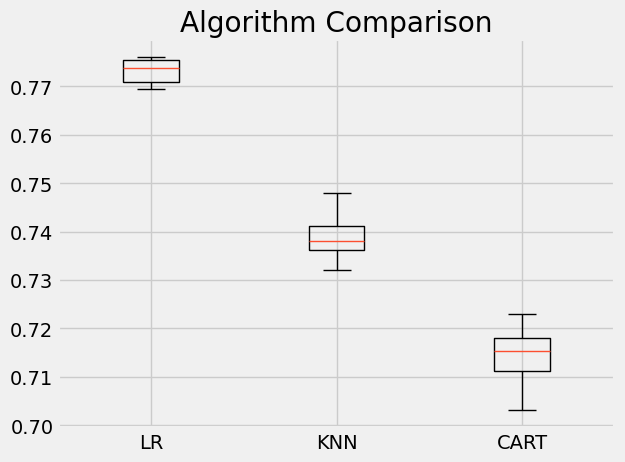

In [110]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define models to test
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'  # Choose the evaluation metric
num_folds = 10  # Number of cross-validation folds

# Iterate over each model
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train_transformed, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Optionally, you can also plot the results for comparison
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


### Tuning

In [111]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

# Calculate scale_pos_weight to be used in xgb classifier
negative_class_count = (Y_train == 0).sum()
positive_class_count = (Y_train == 1).sum()
scale_pos_weights = negative_class_count / positive_class_count

#parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None],
    'learning_rate': [0.1, 0.01, 0.001],
    'scale_pos_weight': [scale_pos_weights]
}

#model
model = XGBClassifier()
kfold = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='recall', verbose=2)
grid_search.fit(X_train_transformed, Y_train)


print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean Recall: %.4f, Standard Deviation: %.4f, Parameters: %s" % (mean, stdev, param))


Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=50, scale_pos_weight=3.401047409040794; total time=   0.2s
[CV] END le

[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=None, n_estimators=100, scale_pos_weight=3.401047409040794; total time=   0.4s
[CV] END learning_rate=0.001, max_depth=None, n_

In [112]:
#parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [50, 100, 150],
    'class_weight': ['balanced']
}

model = LogisticRegression()
kfold = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='recall', verbose=2)
grid_search.fit(X_train_transformed, Y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean Recall: %.4f, Standard Deviation: %.4f, Parameters: %s" % (mean, stdev, param))


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l1; total time=   0.0s
[CV] END .....class_weight=balanced, max_iter=50, penalty=l2; total time=   0.3s
[CV] END .....class_weight=balanced, max_iter=

[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.9s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
[CV] END ..class_weight=balanced, max_iter=150, penalty=None; total time=   0.8s
Best: 0.612269 using {'class_weight': 'balanced', 'max_iter': 50, 'penalty': None}
Mean Recall: nan, Standard Deviation: nan, Parameters: {'class_weight': 'balanced', 'max_iter': 50, 'penalt

### Feature Importance 

In [113]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Assuming you have your features (X) and target variable (y) ready as data frames
# X is your feature matrix and y is the target vector

# Store feature names before converting to array
feature_names = X_train_transformed.columns.tolist()

# Convert data frames to arrays
X_array = X_train_transformed.values
y_array = Y_train.values

# Calculate mutual information gain for each feature
mutual_info = mutual_info_classif(X_array, y_array)
feature_mi_tuples = list(zip(feature_names, mutual_info))

# Sort the features based on mutual information gain
sorted_features = sorted(feature_mi_tuples, key=lambda x: x[1], reverse=True)

# Extract the top-k features with the highest information gain and their names
k = 10 
selected_feature_names = [feature[0] for feature in sorted_features[:k]]
selected_features = X[selected_feature_names]

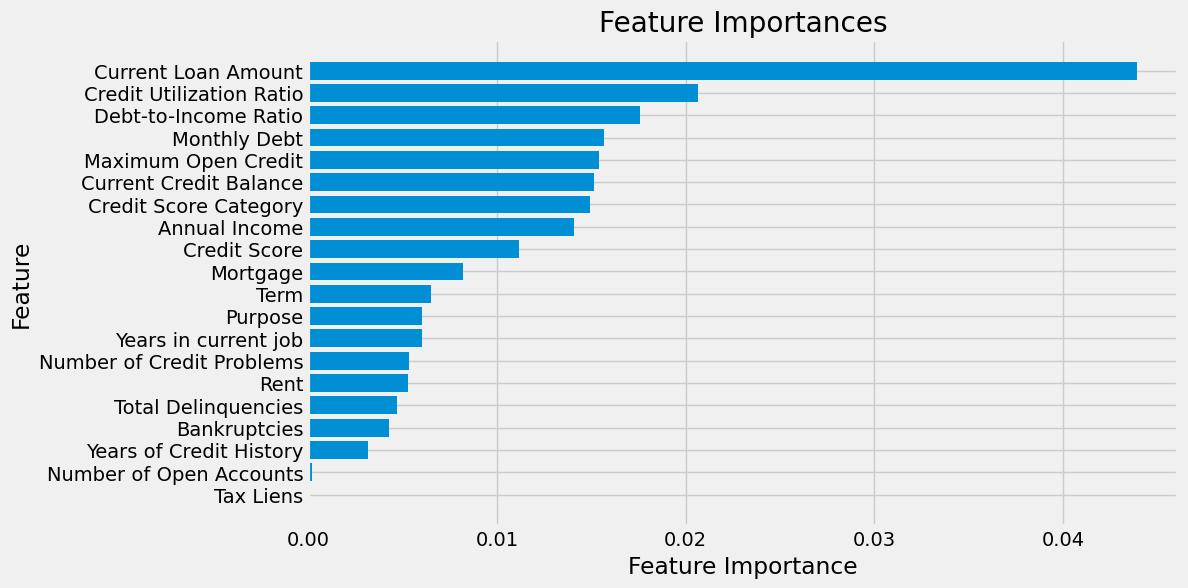

In [114]:
feature_names = [t[0] for t in sorted_features]
importances = [t[1] for t in sorted_features]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()


## Model Finalisation

In [115]:
# Transform the validation data using the same pipeline as X_train
X_validation_transformed = pipe.named_steps['preprocessor'].transform(X_validation)

# Convert the transformed validation data into a DataFrame with appropriate column names
X_validation_transformed = pd.DataFrame(X_validation_transformed, columns=["Current Loan Amount",
                                    "Annual Income", "Monthly Debt", "Years of Credit History", "Number of Open Accounts",
                                    "Number of Credit Problems", "Current Credit Balance", "Maximum Open Credit",
                                    "Bankruptcies", "Tax Liens", "Credit Score", "Total Delinquencies", "Years in current job", 
                                    "Purpose", "Credit Score Category", "Term", "Credit Utilization Ratio","Debt-to-Income Ratio",
                                    "Rent","Mortgage"])


X_validation_transformed


# prepare the model
model = XGBClassifier(learning_rate= 0.01, max_depth= None, n_estimators= 50, scale_pos_weight= 3.4327238558478887)
model.fit(X_train_transformed, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_validation_transformed )
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5404579387744877
[[7393 8119]
 [1053 3394]]
              precision    recall  f1-score   support

           0       0.88      0.48      0.62     15512
           1       0.29      0.76      0.43      4447

    accuracy                           0.54     19959
   macro avg       0.59      0.62      0.52     19959
weighted avg       0.75      0.54      0.57     19959



In [116]:
y_pred_proba = model.predict_proba(X_validation_transformed)[:, 1]
roc_auc = roc_auc_score(Y_validation, y_pred_proba) #roc auc score
roc_auc

0.6771565784305278

# Model Selection and Training 2 

## Tried different resampling techniques here but need more research on how to optimize it

In [117]:
# Split-out validation dataset
X = df.drop(columns=['Loan Status', 'Home Ownership'])  # Features (all columns except 'Loan Status')
Y = df['Loan Status']  # Target variable

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=0.2)

In [118]:
set_config(display="diagram")
# ColumnTransformer Label Encoder
preprocessor2 = ColumnTransformer([
    ("numeric", numeric_processor, ["Current Loan Amount",
                                    "Annual Income", "Monthly Debt", "Years of Credit History", "Number of Open Accounts",
                                    "Number of Credit Problems", "Current Credit Balance", "Maximum Open Credit",
                                    "Bankruptcies", "Tax Liens", "Credit Score", "Total Delinquencies"]),
    ("passthrough", "passthrough", ["Years in current job", 
                               "Purpose", "Credit Score Category", "Term", "Credit Utilization Ratio",
                                    "Debt-to-Income Ratio", "Rent","Mortgage"])])


# Create a pipeline for transformation
transform_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [119]:
# Split data into training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2)

# This is for the parameter to be used in XGBClassifier
negative_class_count = (Y_train == 0).sum()
positive_class_count = (Y_train == 1).sum()
scale_pos_weights = negative_class_count / positive_class_count

classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(scale_pos_weight=scale_pos_weights)
}


sampling_techniques = {
    'No Sampling': None,
    'Random OverSampling': RandomOverSampler(),
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN(),
    'SMOTETomek': SMOTETomek(),
    'SMOTEENN': SMOTEENN()
}


# Define evaluation metrics
evaluation_metrics = ['Precision', 'Recall', 'F1-score', 'ROC-AUC']

#Labeling for categorical columns
cat_cols = [ 'Years in current job', 'Purpose']
label = LabelEncoder()
for column in cat_cols:
    # Fit and transform the column data
    labeled_data_train = label.fit_transform(X_train[[column]])

    # Replace the original column with scaled data
    X_train[column] = labeled_data_train

    # Transform the validation data using parameters from training data
    labeled_data_validation = label.transform(X_validation[[column]])

    # Replace the original column with scaled data for validation data
    X_validation[column] = labeled_data_validation
    
# Create OrdinalEncoder for credit score categories
credit_score_categories = [['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']]
label_encoder = OrdinalEncoder(categories=credit_score_categories)
X_train['Credit Score Category'] = label_encoder.fit_transform(X_train[['Credit Score Category']])
X_validation['Credit Score Category'] = label_encoder.transform(X_validation[['Credit Score Category']])


# Iterate over classifiers(models)
for classifier_name, classifier in classifiers.items():
    print(f"Evaluating {classifier_name}:")
    print('    ')
    
    # Iterate over sampling techniques
    for technique_name, sampler in sampling_techniques.items():
        print(f"Sampling Technique: {technique_name}")
        steps = []
        if sampler:
            steps.append(('sampler', sampler))
            
        steps.append(('preprocessor2', preprocessor2))
        steps.append(('classifier', classifier))
        
        #we now create pipeline
        pipeline = ImbPipeline(steps)

        # Fit 
        pipeline.fit(X_train, Y_train)
        y_pred_proba = pipeline.predict_proba(X_validation)[:, 1]
        y_pred = pipeline.predict(X_validation)
        
        # evaluation metrics
        precision = precision_score(Y_validation, y_pred)
        recall = recall_score(Y_validation, y_pred)
        f1 = f1_score(Y_validation, y_pred)
        roc_auc = roc_auc_score(Y_validation, y_pred_proba)
        accuracy = accuracy_score(Y_validation, y_pred)
        cm = confusion_matrix(Y_validation, y_pred)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")
        print(f"ROC-AUC: {roc_auc}")
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(cm)
        
        print("=" * 50)
    print('  ')


Evaluating Logistic Regression:
    
Sampling Technique: No Sampling
Precision: 0.2901001831304535
Recall: 0.5952696728558797
F1-score: 0.39009198232780473
ROC-AUC: 0.6175971967667957
Accuracy: 0.5780850744025252
Confusion Matrix:
[[8845 6590]
 [1831 2693]]
Sampling Technique: Random OverSampling
Precision: 0.2877798007925458
Recall: 0.5939434129089302
F1-score: 0.38770651468148043
ROC-AUC: 0.6177586937263222
Accuracy: 0.5747782955057869
Confusion Matrix:
[[8785 6650]
 [1837 2687]]
Sampling Technique: SMOTE
Precision: 0.2762910798122066
Recall: 0.26016799292661363
F1-score: 0.2679872495446266
ROC-AUC: 0.5651971116432762
Accuracy: 0.6778395711207976
Confusion Matrix:
[[12352  3083]
 [ 3347  1177]]
Sampling Technique: ADASYN
Precision: 0.2734915924826904
Recall: 0.24447391688771
F1-score: 0.25816993464052285
ROC-AUC: 0.5633628172333309
Accuracy: 0.6815471717019891
Confusion Matrix:
[[12497  2938]
 [ 3418  1106]]
Sampling Technique: SMOTETomek
Precision: 0.2759601706970128
Recall: 0.25729

KeyboardInterrupt: 

# M3

In [ ]:
type(X_train_transformed['Current Loan Amount'])

In [ ]:
model[0]

In [ ]:
model= ('LR', LogisticRegression(class_weight='balanced'))
columns = X.columns

# Evaluate each model
results = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
names = []
num_folds = 10  # Number of cross-validation folds

# Iterate over each column
for column in columns:
    X_temp = pd.DataFrame(X_train_transformed[[column]])
    kfold = KFold(n_splits=num_folds)
    cv_results_acc = cross_val_score(model[1], X_temp, Y_train, cv=kfold, scoring='accuracy')
    cv_results_prec = cross_val_score(model[1], X_temp, Y_train, cv=kfold, scoring='precision')
    cv_results_recall = cross_val_score(model[1], X_temp, Y_train, cv=kfold, scoring='recall')
    cv_results_f1 = cross_val_score(model[1], X_temp, Y_train, cv=kfold, scoring='f1', verbose = 1)
    results['Accuracy'].append(cv_results_acc)
    results['Precision'].append(cv_results_prec)
    results['Recall'].append(cv_results_recall)
    results['F1 Score'].append(cv_results_f1)
    msg = "%s: Accuracy - Mean: %.3f, Std: %.3f | Precision - Mean: %.3f, Std: %.3f | Recall - Mean: %.3f, Std: %.3f | F1 Score - Mean: %.3f, Std: %.3f" % (
        column, cv_results_acc.mean(), cv_results_acc.std(),
        cv_results_prec.mean(), cv_results_prec.std(),
        cv_results_recall.mean(), cv_results_recall.std(),
        cv_results_f1.mean(), cv_results_f1.std())
    
    print(msg)
    
